In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Create Path
path = "Data/dataset.csv"

#Read CSV crete dataframe
df = pd.read_csv(path)


In [3]:
#look at data
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Breakdown of the numerical values of the data

## Education Level:
1. Secondary education
2. Higher education - bachelor's degree
3. Higher education - degree
4. Higher education - master's degree
5. Higher education - doctorate
6. Frequency of higher education
7. 12th year of schooling - not completed
8. 11th year of schooling - not completed
9. Other - 11th year of schooling
10. 10th year of schooling
11. 10th year of schooling - not completed
12. Basic education 3rd cycle (9th/10th/11th year) or equivalent
13. Basic education 2nd cycle (6th/7th/8th year) or equivalent
14. Technological specialization course
15. Higher education - degree (1st cycle)
16. Professional higher technical course
17. Higher education - master's degree (2nd cycle)


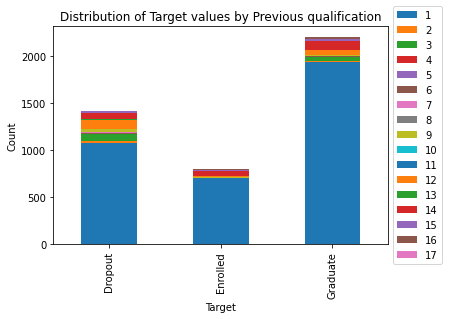

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Group the data by Previous qualification and Target
grouped = df.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')

# Pivot the data to create a DataFrame with the columns as Previous qualification categories and the rows as Target values
pivot = grouped.pivot(index='Target', columns='Previous qualification', values='counts')

# Plot the stacked bar chart
pivot.plot(kind='bar', stacked=True)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target values by Previous qualification')


plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()




In [5]:
grouped.transpose()


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
Previous qualification,1,1,1,2,2,2,3,3,3,4,...,14,14,15,15,15,16,16,16,17,17
Target,Dropout,Enrolled,Graduate,Dropout,Enrolled,Graduate,Dropout,Enrolled,Graduate,Dropout,...,Enrolled,Graduate,Dropout,Enrolled,Graduate,Dropout,Enrolled,Graduate,Dropout,Graduate
counts,1078,698,1941,16,1,6,75,4,47,4,...,55,95,14,6,20,6,8,22,2,4


In [21]:
#Scatter Plot

# data
x = df["Previous qualification"]
y = df["Target"]

# plotting
plt.scatter(x, y)
plt.xlabel("Previous qualification")
plt.ylabel("Target")
plt.show()


KeyError: 'Previous qualification'

In [14]:
grouped_qual

NameError: name 'grouped_qual' is not defined

In [20]:

plt.scatter(df['Previous qualification'], df['Target'])

# Add x and y labels
plt.xlabel('Previous Qualification')
plt.ylabel('Target')

# Show the plot
plt.show()


KeyError: 'Previous qualification'

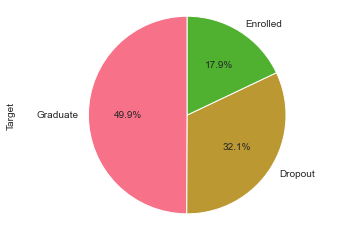

In [17]:
import matplotlib.pyplot as plt

df['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


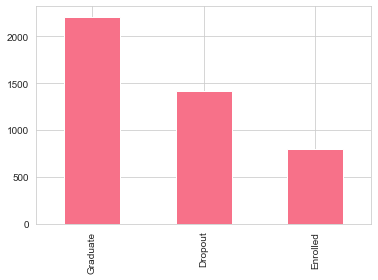

In [18]:
import matplotlib.pyplot as plt

df['Target'].value_counts().plot(kind='bar')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


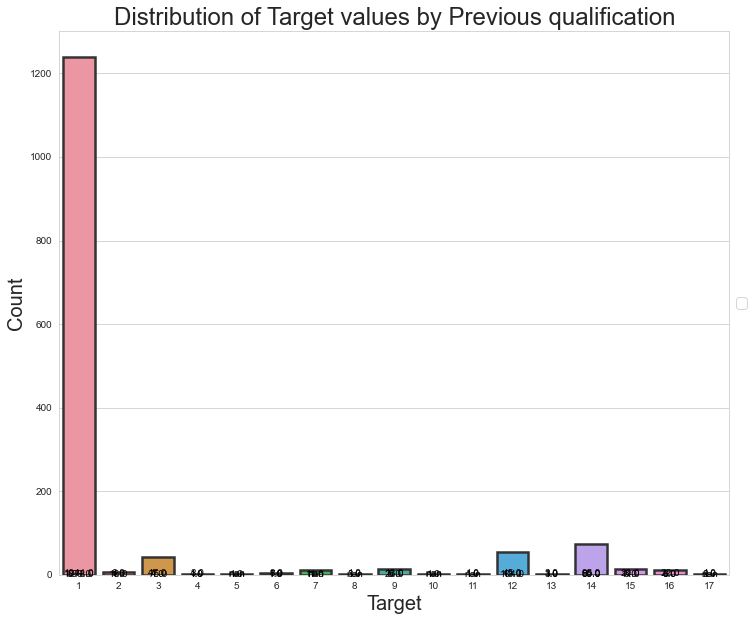

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Group the data by Previous qualification and Target
visual = grouped.groupby(['Previous qualification', 'Target']).size().reset_index(name='counts')

# Pivot the data to create a DataFrame with the columns as Previous qualification categories and the rows as Target values
pivot = grouped.pivot(index='Target', columns='Previous qualification', values='counts')

# Plot the stacked bar chart using Seaborn library
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(12,10))
sns.barplot(data=pivot, errorbar=None, edgecolor=".2", linewidth=2.5)


# Increase font size of labels, title, and legend
plt.xlabel('Target', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Target values by Previous qualification', fontsize=24)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14)







# Add annotations to highlight important information
for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        plt.text(j, i, pivot.iloc[i, j], ha="center", va="center", color="black", fontsize=10)

# Show the plot
plt.show()
